# Data Scientist Associate Practical Exam

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/moped.csv')
df

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...
708,Commuting,> 6 months,Gemopai Ryder,2.0,2.0,NaN,2.0,NaN,3.0
709,Leisure,<= 6 months,Gemopai Ryder,5.0,5.0,5.0,NaN,5.0,NaN
710,Commuting,> 6 months,Gemopai Ryder,2.0,2.0,3.0,NaN,1.0,NaN
711,Commuting,<= 6 months,Gemopai Ryder,4.0,4.0,NaN,4.0,NaN,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


In [4]:
df.describe()

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713.000000,713.000000,183.000000,510.000000,176.000000,370.00000
mean,3.768583,3.314165,2.928962,3.650980,3.392045,3.37027
std,1.359949,1.584523,1.637602,1.404368,1.389653,1.52688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,3.000000,2.000000,1.000000,3.000000,2.000000,2.00000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,4.00000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [5]:
categorical = ['Used it for','Owned for','Model Name']
for cat in categorical:
    print(df[cat].unique())

['Commuting' 'Leisure']
['Never owned' '> 6 months' '<= 6 months']
['TVS iQube' 'Revolt RV 400' 'Bajaj Chetak' 'OLA S1 Pro' 'Ather 450X'
 'Hero Electric Optima' 'Tork Kratos' 'OLA S1' 'Bounce Infinity E1'
 'Hero Electric Optima CX' 'Hero Electric Flash' 'Ampere Magnus EX'
 'Revolt RV 300' 'Hero Electric Photon' 'Okinawa Praise' 'Benling Aura'
 'Ampere Magnus Pro' 'PURE EV EPluto 7G' 'Ampere REO' 'Odysse Evoqis'
 'Okinawa i-Praise' 'Joy e-bike Monster' 'PURE EV ETrance Neo'
 'Evolet Polo' 'Okinawa Ridge Plus' 'Ampere Zeal' 'Hero Electric Atria'
 'Okinawa Lite' 'Hero Electric NYX' 'Okinawa R30' 'Yo Drift' 'BGauss B8'
 'Joy e-bike Wolf' 'Gemopai Astrid Lite' 'Techo Electra Emerge'
 'Techo Electra Raptor' 'e-bike Gen Nxt' 'Gemopai Ryder']


In [6]:
df['Owned'] = np.where(df['Owned for']!= 'Never owned', 1, 0)
df

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,Owned
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0,0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0,1
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0,1
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0,1
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...
708,Commuting,> 6 months,Gemopai Ryder,2.0,2.0,NaN,2.0,NaN,3.0,1
709,Leisure,<= 6 months,Gemopai Ryder,5.0,5.0,5.0,NaN,5.0,NaN,1
710,Commuting,> 6 months,Gemopai Ryder,2.0,2.0,3.0,NaN,1.0,NaN,1
711,Commuting,<= 6 months,Gemopai Ryder,4.0,4.0,NaN,4.0,NaN,5.0,1


In [7]:
numerical = ['Visual Appeal','Reliability','Extra Features','Comfort','Maintenance cost','Value for Money']

for num in numerical:
    df[num].fillna(value = 0,inplace=True)
    
df

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,Owned
0,Commuting,Never owned,TVS iQube,3.0,4.0,0.0,4.0,0.0,1.0,0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,0.0,3.0,0.0,3.0,1
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,0.0,5.0,0.0,2.0,1
3,Commuting,> 6 months,TVS iQube,1.0,1.0,0.0,1.0,0.0,1.0,1
4,Commuting,> 6 months,TVS iQube,3.0,4.0,0.0,3.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
708,Commuting,> 6 months,Gemopai Ryder,2.0,2.0,0.0,2.0,0.0,3.0,1
709,Leisure,<= 6 months,Gemopai Ryder,5.0,5.0,5.0,0.0,5.0,0.0,1
710,Commuting,> 6 months,Gemopai Ryder,2.0,2.0,3.0,0.0,1.0,0.0,1
711,Commuting,<= 6 months,Gemopai Ryder,4.0,4.0,0.0,4.0,0.0,5.0,1


## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

_Description:_
All columns were validated against requirements. I checked if columns that contain categorical data actually contain only what we expect them to contain. 
Column 'Used it for' contained only 2 values as expected. 
A new column was added called 'Owned' to determine based on 'Owned for' weather the reviewer owned a moped or not. For column 'Model name' I determined that there are a lot of different models that were reviewed but there seemed to be no errors with this data.

For numerical columns, only two didn't have nulls, 'Visual Appeal' and 'Reliability'. For other columns nulls were changed to 0 as requested. All numbers fit between 1-5 range if we don;t count zeros that came from changing nulls to 0.


In [8]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 

Used it for


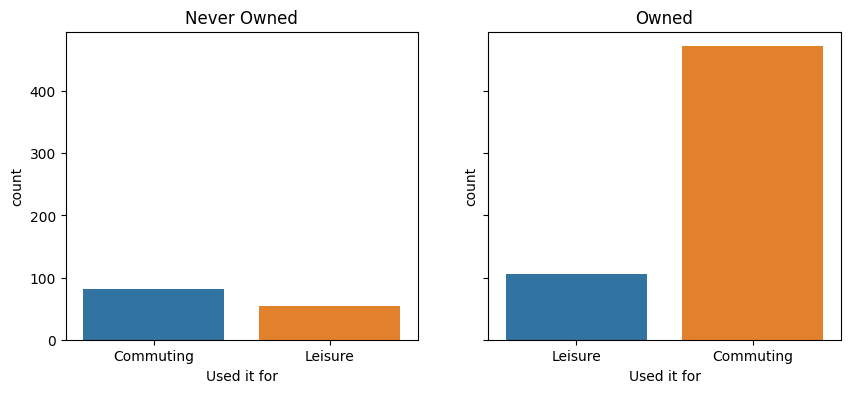

Owned for


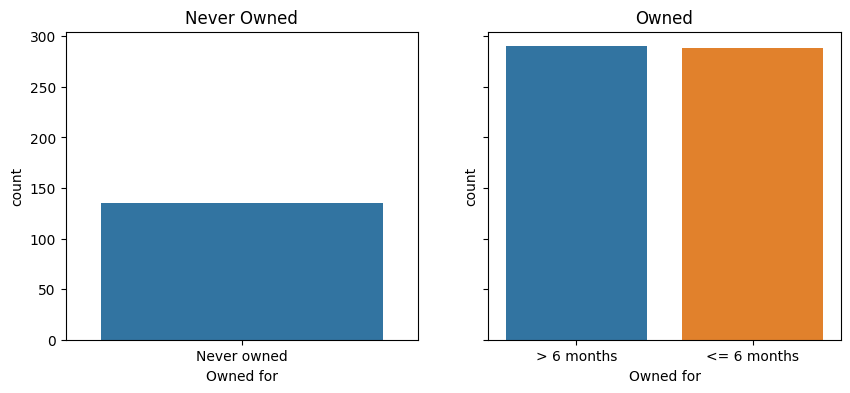

Model Name


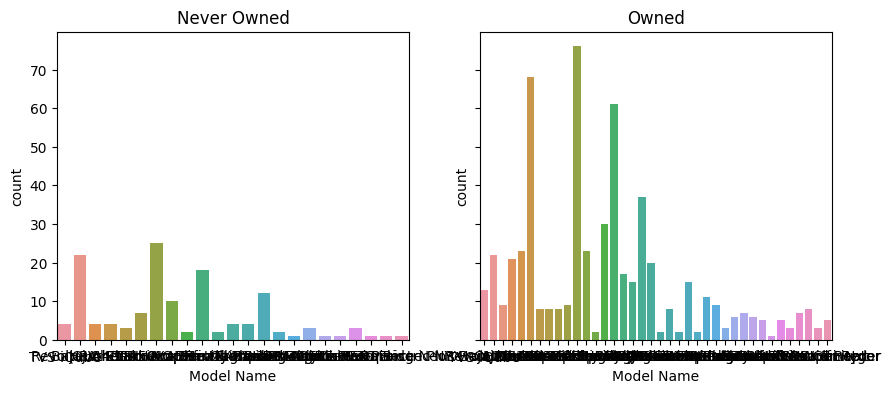

Visual Appeal


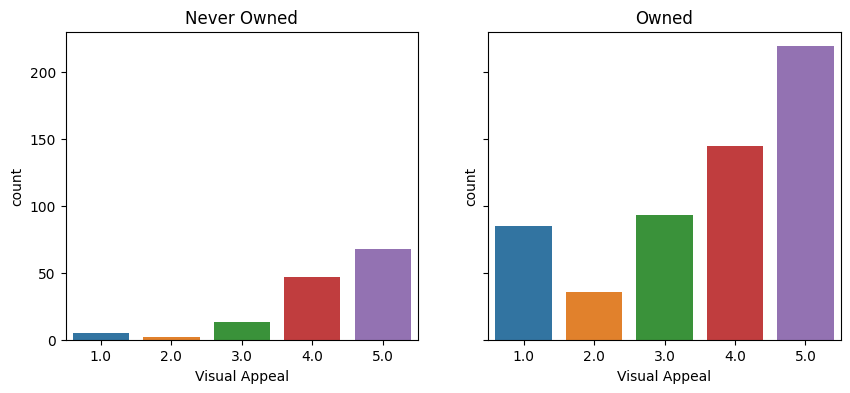

Reliability


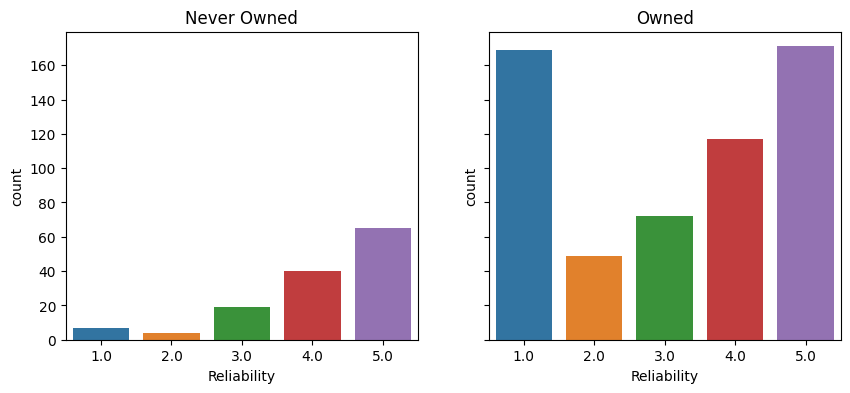

Extra Features


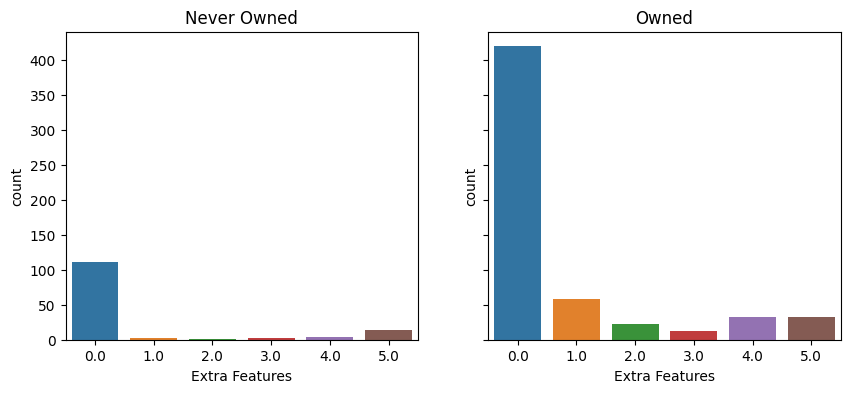

Comfort


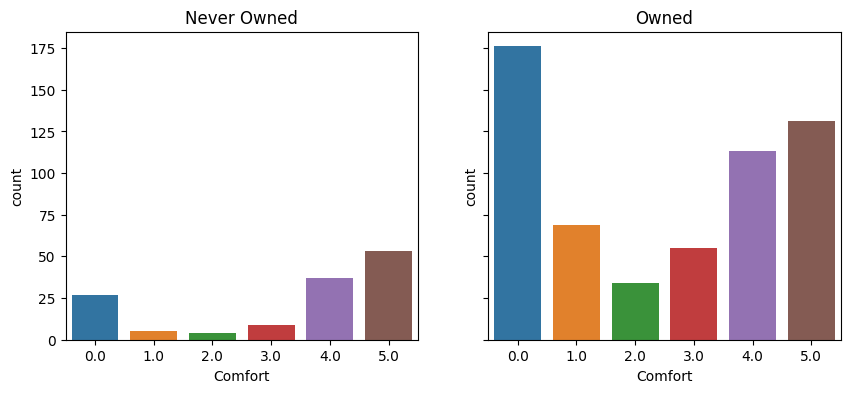

Maintenance cost


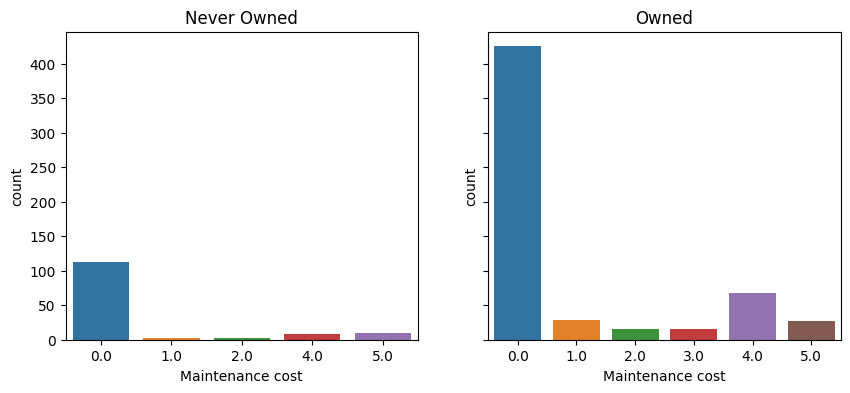

Value for Money


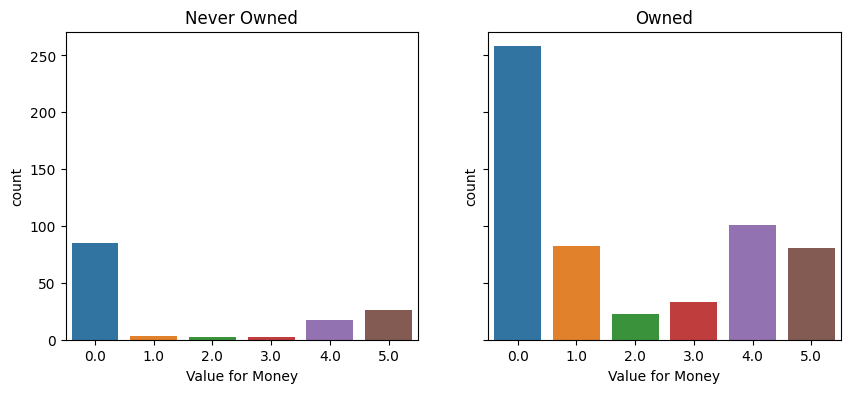

Owned


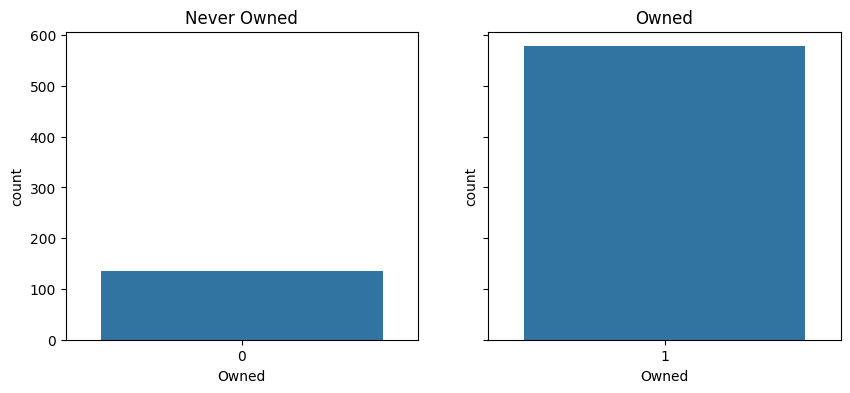

In [9]:
df_never_owned = df.loc[df['Owned']==0,:]
df_owned = df.loc[df['Owned']==1,:]


for col in df.columns:
    print (col)
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
    sns.countplot(x=df_never_owned[col], ax=ax[0])
    sns.countplot(x=df_owned[col], ax=ax[1])
    ax[0].set_title('Never Owned')
    ax[1].set_title('Owned')
    plt.show()



<AxesSubplot:xlabel='Owned', ylabel='Comfort'>

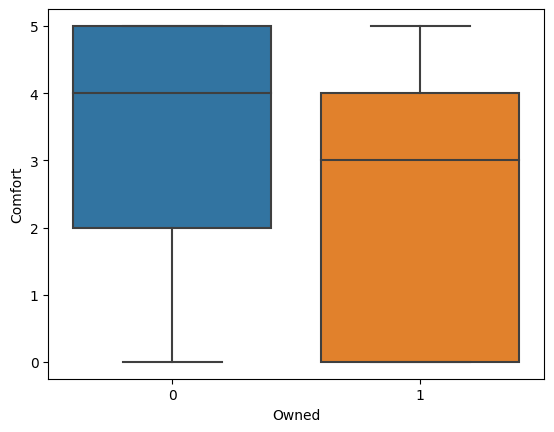

In [38]:
sns.boxplot(data = df, x='Owned',y='Comfort')

<AxesSubplot:xlabel='Owned', ylabel='Reliability'>

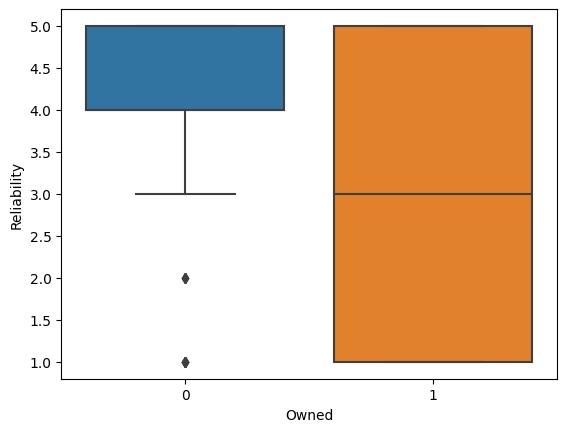

In [44]:
sns.boxplot(x=df['Owned'],y=df['Reliability'])

In [62]:
df.loc[df['Owned']==1,'Reliability'].median()

3.0

<AxesSubplot:xlabel='Reliability', ylabel='Count'>

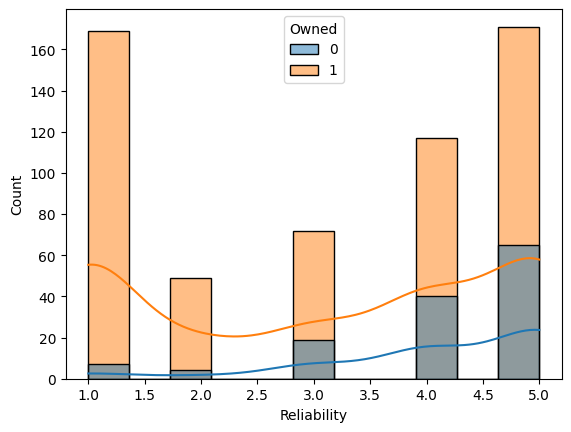

In [57]:
sns.histplot(x=df['Reliability'],hue=df['Owned'],kde=True)

Used it for


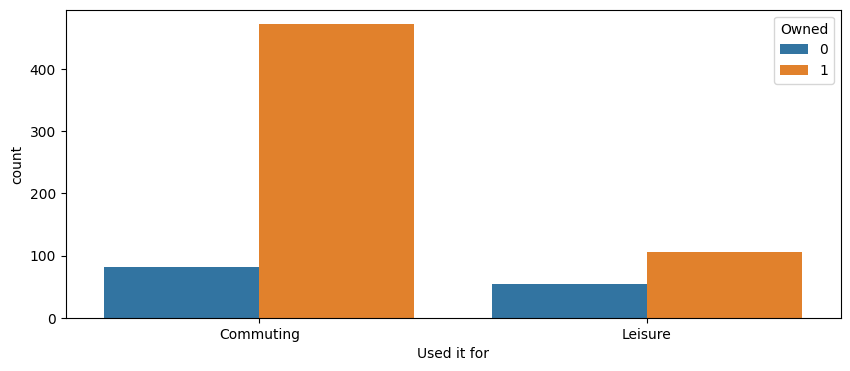

Owned for


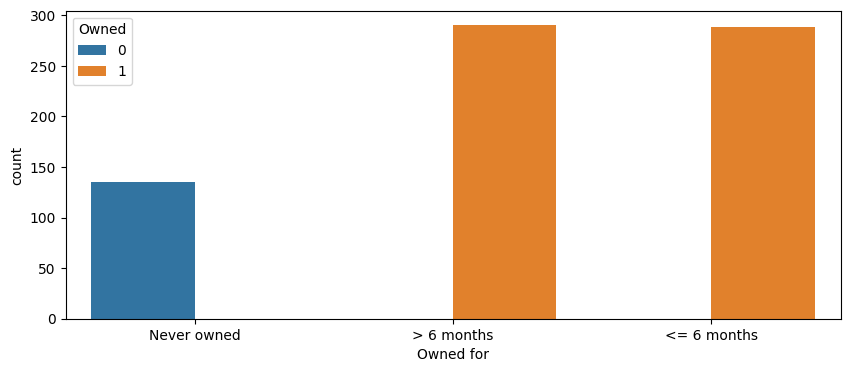

Model Name


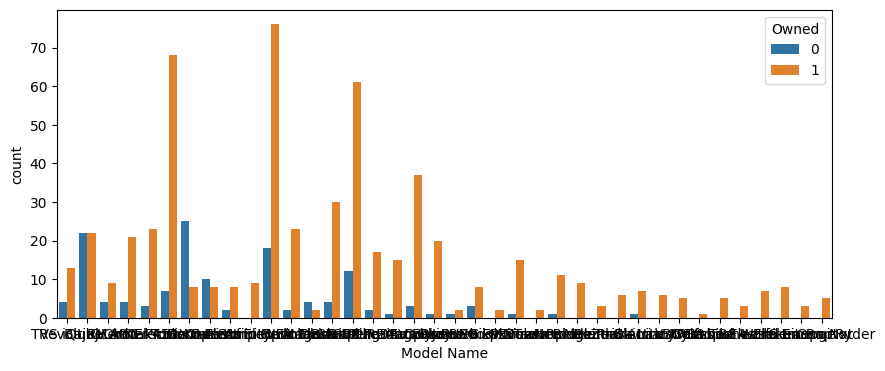

Visual Appeal


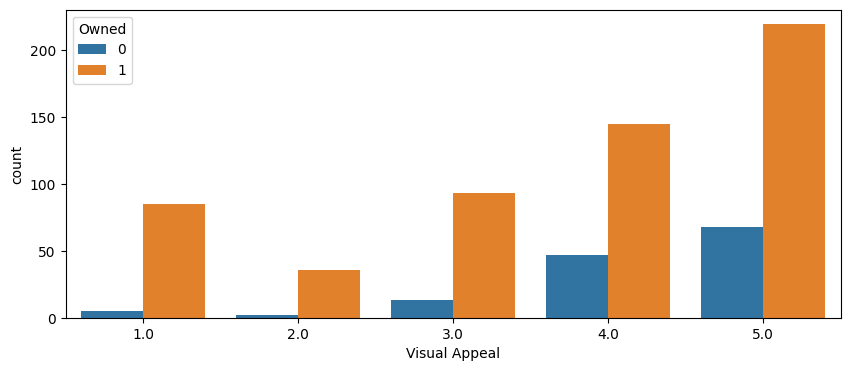

Reliability


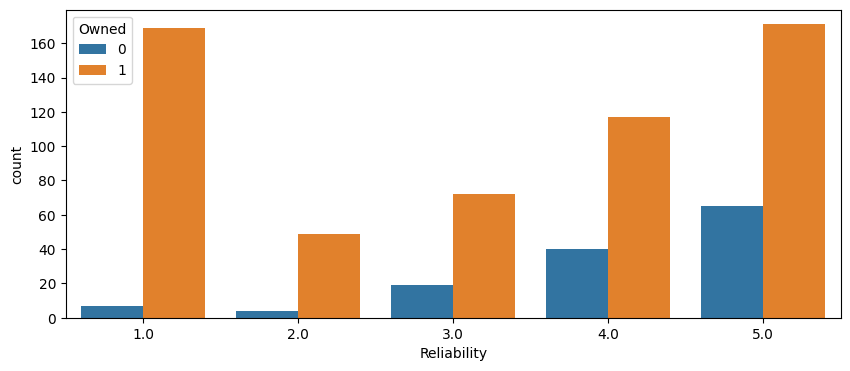

Extra Features


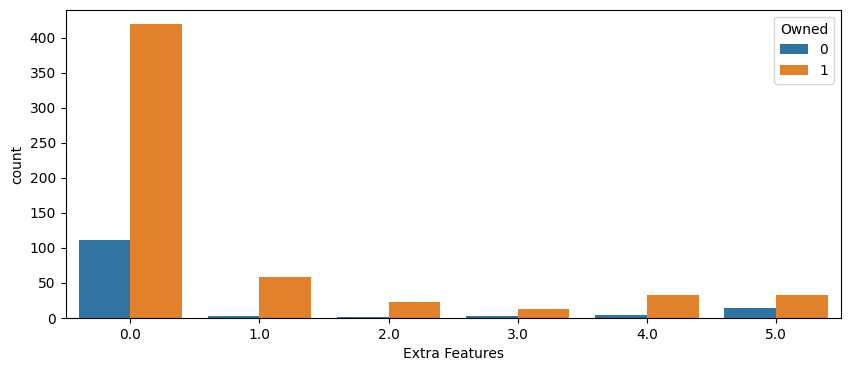

Comfort


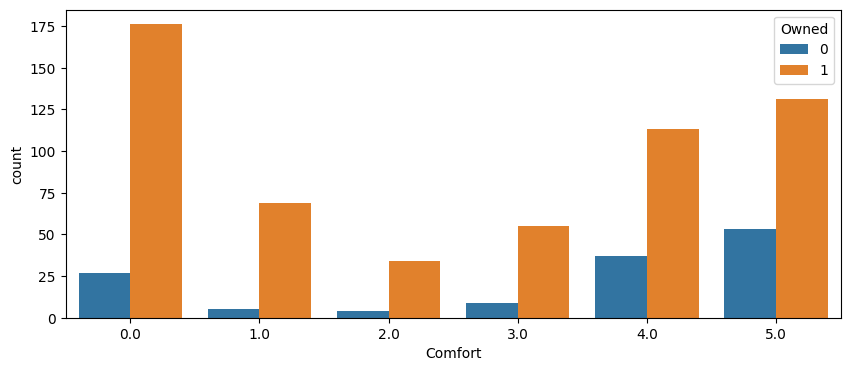

Maintenance cost


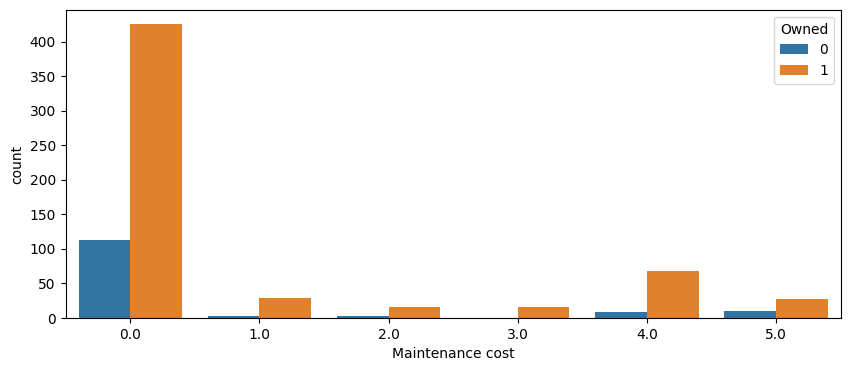

Value for Money


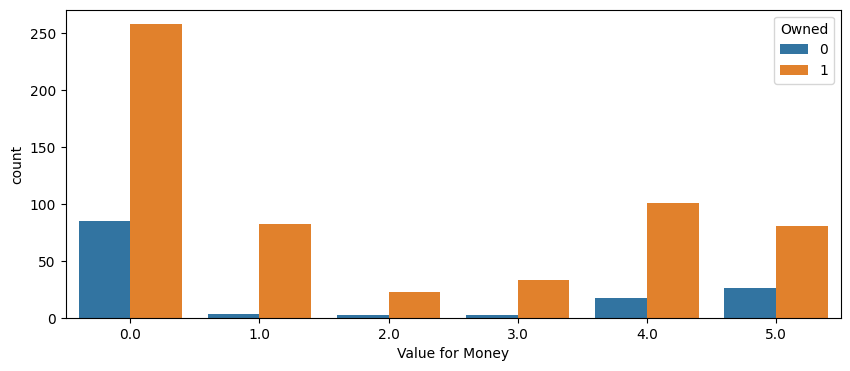

Owned


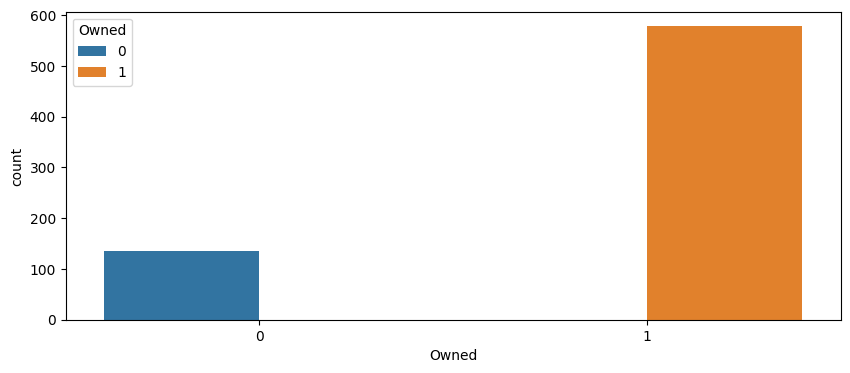

In [10]:
for col in df.columns:
    print (col)
    fig, ax = plt.subplots( figsize=(10, 4))
    sns.countplot(x=df[col], ax=ax,hue=df['Owned'])
    # sns.countplot(x=df_owned[col], ax=ax[1])
    # ax[0].set_title('Never Owned')
    # ax[1].set_title('Owned')
    plt.show()


<AxesSubplot:>

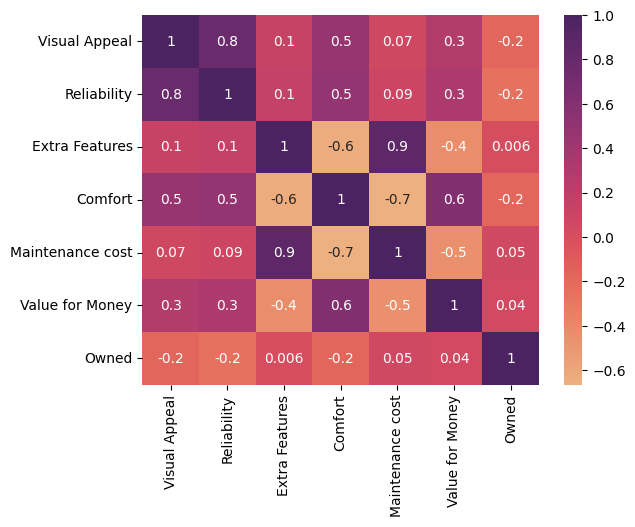

In [11]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='.1g',cmap='flare')

There is a significant difference of number of records between Owned and Never Owned ~4:1 and the dataset is not balanced between two categories which are going to be predicted.


## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of single variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*

A distribution of variable 'Used for' for non-owners is relatively similar while for previous owners it is dominated by users which used a moped for commuting. Looking at a created column 'Owned' there is a very high disproportion between two classes which later are going to be predicted. This causes an imbalanced dataset which is a reason why later an Oversampling method is used. 
**With the use of histplot and boxplot for column 'Reliability' it is shown that previous owners are much more likely to give a low score than a non-owner and it is worth noting that this field was filled in all cases.**

Variable 'Value for money' is more likely to be filled by an owner rather than a person not owning a moped which is shown on countplots above. Also 'Maintenance cost' and 'Extra features' are strongly positively correlated and 'Maintenance cost' and 'Comfort' are strongly negatively correlated. The first correlation is caused by a high number of fields with no result which came as null and a correlation with comfort is caused by an opposite reason where a lot of fields are not nulls, and filled especially by previous owners.

The data showed that non-users more often leave sections blank when compared to previous users and that the whole dataset is imbalanced which needs to be accounted for.

I created a new column 'Owned' that encapsulates the information in 'Owned for' column. I left out column 'Model name' as in my opinion it does not carry significant information and using OneHotEncoder for such a high number of categories may only cause trouble for the model. Apart from this I did not delete rows with blanks as this may carry an information that may be helpful for the model. However it may be a possible direction to explore in the future.

In [12]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 

"""
Selected models:
- Decision Tree
- Naive Bayes
- Nearest Neighbours

Reference:
- Dummy Classifier
""" 

from imblearn.over_sampling import RandomOverSampler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

ros = RandomOverSampler(random_state=42)
dummy_model = DummyClassifier(strategy='stratified')
# X_resampled, y_resampled = ros.fit_resample(X, y)

In [13]:
categorical_features = ['Used it for']
numeric_features = ['Visual Appeal','Reliability','Extra Features', 'Comfort','Maintenance cost','Value for Money']

In [14]:
numeric_transformer = Pipeline(steps=[
     # ('log_transformer', PowerTransformer()),
     ('standardscaler',StandardScaler())
])

nb_numeric_transformer = Pipeline(steps=[
     ('minmaxscaler', MinMaxScaler(feature_range=(0,1)))
     # ('standardscaler',StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('OHE', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer, numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

nb_preprocessor = ColumnTransformer(
    transformers=[
        ('num',nb_numeric_transformer, numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [15]:
training_features = categorical_features + numeric_features

X = df.loc[:,training_features]
y = df.loc[:,['Owned']]

X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [16]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classification',LogisticRegression())
])

print(lr_pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classification', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__standardscaler', 'preprocessor__num__standardscaler__copy', 'preprocessor__num__standardscaler__with_mean', 'preprocessor__num__standardscaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__OHE', 'preprocessor__cat__OHE__categories', 'preprocessor__cat__OHE__drop', 'preprocessor__cat__OHE__dtype', 'preprocessor__cat__OHE__handle_unknown', 'preprocessor__cat__OHE__max_categories', 'preprocessor__cat__OHE__min_frequency', 'preprocessor__cat__OHE__sparse', 'classification__C', 'clas

In [17]:
lr_params = {
    'preprocessor__cat__OHE__handle_unknown':['ignore'],
    'classification__penalty':['l1','l2','None'],
    # 'classification__dual':['False'],
    'classification__solver':['liblinear','lbfgs','newton-cholesky'],
    'classification__random_state':[42,2022],
    'classification__multi_class':['ovr']
}

lr_gridsearch = GridSearchCV(lr_pipeline,
                                lr_params,
                                scoring='f1',
                                cv=10,
                                verbose=10)

lr_gridsearch.fit(X_train,y_train)
print('\nBest hyperparameters:', lr_gridsearch.best_params_)
lr_gridsearch_model = lr_gridsearch.best_estimator_

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10; 1/18] START classification__multi_class=ovr, classification__penalty=l1, classification__random_state=42, classification__solver=liblinear, preprocessor__cat__OHE__handle_unknown=ignore
[CV 1/10; 1/18] END classification__multi_class=ovr, classification__penalty=l1, classification__random_state=42, classification__solver=liblinear, preprocessor__cat__OHE__handle_unknown=ignore;, score=0.597 total time=   0.0s
[CV 2/10; 1/18] START classification__multi_class=ovr, classification__penalty=l1, classification__random_state=42, classification__solver=liblinear, preprocessor__cat__OHE__handle_unknown=ignore
[CV 2/10; 1/18] END classification__multi_class=ovr, classification__penalty=l1, classification__random_state=42, classification__solver=liblinear, preprocessor__cat__OHE__handle_unknown=ignore;, score=0.683 total time=   0.0s
[CV 3/10; 1/18] START classification__multi_class=ovr, classification__penalty=l1, classifi

In [18]:
nb_pipeline = Pipeline(steps=[
    ('preprocessor',nb_preprocessor),
    ('classification',CategoricalNB())
])

print(nb_pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classification', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__minmaxscaler', 'preprocessor__num__minmaxscaler__clip', 'preprocessor__num__minmaxscaler__copy', 'preprocessor__num__minmaxscaler__feature_range', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__OHE', 'preprocessor__cat__OHE__categories', 'preprocessor__cat__OHE__drop', 'preprocessor__cat__OHE__dtype', 'preprocessor__cat__OHE__handle_unknown', 'preprocessor__cat__OHE__max_categories', 'preprocessor__cat__OHE__min_frequency', 'preprocessor__cat__OHE__sparse', 'classification__alpha', 'classifi

In [19]:
nb_params = {
    'preprocessor__cat__OHE__handle_unknown':['ignore'],
    'classification__alpha':[0,1],
    'classification__min_categories':[None,1,2,5]
}

nb_gridsearch = GridSearchCV(nb_pipeline,
                                nb_params,
                                scoring='f1',
                                cv=10,
                                verbose=10,
                                error_score='raise'
                            )

nb_gridsearch.fit(X_train,y_train)
print('\nBest hyperparameters:', nb_gridsearch.best_params_)
nb_gridsearch_model = nb_gridsearch.best_estimator_

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START classification__alpha=0, classification__min_categories=None, preprocessor__cat__OHE__handle_unknown=ignore
[CV 1/10; 1/8] END classification__alpha=0, classification__min_categories=None, preprocessor__cat__OHE__handle_unknown=ignore;, score=0.543 total time=   0.0s
[CV 2/10; 1/8] START classification__alpha=0, classification__min_categories=None, preprocessor__cat__OHE__handle_unknown=ignore
[CV 2/10; 1/8] END classification__alpha=0, classification__min_categories=None, preprocessor__cat__OHE__handle_unknown=ignore;, score=0.759 total time=   0.0s
[CV 3/10; 1/8] START classification__alpha=0, classification__min_categories=None, preprocessor__cat__OHE__handle_unknown=ignore
[CV 3/10; 1/8] END classification__alpha=0, classification__min_categories=None, preprocessor__cat__OHE__handle_unknown=ignore;, score=0.560 total time=   0.0s
[CV 4/10; 1/8] START classification__alpha=0, classification__min_catego

In [20]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classification',DecisionTreeClassifier())
])

print(dt_pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classification', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__standardscaler', 'preprocessor__num__standardscaler__copy', 'preprocessor__num__standardscaler__with_mean', 'preprocessor__num__standardscaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__OHE', 'preprocessor__cat__OHE__categories', 'preprocessor__cat__OHE__drop', 'preprocessor__cat__OHE__dtype', 'preprocessor__cat__OHE__handle_unknown', 'preprocessor__cat__OHE__max_categories', 'preprocessor__cat__OHE__min_frequency', 'preprocessor__cat__OHE__sparse', 'classification__ccp_alpha

In [21]:
dt_params = {
    'classification__criterion':['gini','entropy','log_loss'],
    'classification__splitter':['best','random'],
    'classification__max_depth':[None,1,2,4],
    'classification__max_features':['auto','sqrt','log2']
}

dt_gridsearch = GridSearchCV(dt_pipeline,
                                dt_params,
                                scoring='f1',
                                cv=10,
                                verbose=10,
                                error_score='raise'
                            )

dt_gridsearch.fit(X_train,y_train)
print('\nBest hyperparameters:', dt_gridsearch.best_params_)
dt_gridsearch_model = dt_gridsearch.best_estimator_

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10; 1/72] START classification__criterion=gini, classification__max_depth=None, classification__max_features=auto, classification__splitter=best
[CV 1/10; 1/72] END classification__criterion=gini, classification__max_depth=None, classification__max_features=auto, classification__splitter=best;, score=0.677 total time=   0.0s
[CV 2/10; 1/72] START classification__criterion=gini, classification__max_depth=None, classification__max_features=auto, classification__splitter=best
[CV 2/10; 1/72] END classification__criterion=gini, classification__max_depth=None, classification__max_features=auto, classification__splitter=best;, score=0.857 total time=   0.0s
[CV 3/10; 1/72] START classification__criterion=gini, classification__max_depth=None, classification__max_features=auto, classification__splitter=best
[CV 3/10; 1/72] END classification__criterion=gini, classification__max_depth=None, classification__max_features=auto, c

In [22]:
print('\nBest hyperparameters:', dt_gridsearch.best_params_)
dt_gridsearch_model = dt_gridsearch.best_estimator_


Best hyperparameters: {'classification__criterion': 'gini', 'classification__max_depth': None, 'classification__max_features': 'log2', 'classification__splitter': 'random'}


## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

*Write your description here*

The problem that I am facing is a binary classification problem. I have to create the best model that based on fed data will be able to classify into one of two classes.

I chose a dummy classifier with stratified strategy which randomly selects a class to be assigned which reflects the distribution of train data. If dataset is balanced, the score should be close to 50% which it is.

To compare I chose 3 different classification methods, Logistic Regression, Naive Bayes and Decission Tree for which I set up pipelines with grid search to find the best set of hyperparameters. The choice for possible hyperparameters was based on experience.

In [23]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Start coding here... 

In [24]:
dummy_model.fit(X_train,y_train)
dummy_pred = dummy_model.predict(X_test)

In [25]:
lr_pred = lr_gridsearch_model.predict(X_test)
nb_pred = nb_gridsearch_model.predict(X_test)
dt_pred = dt_gridsearch_model.predict(X_test)

In [26]:
# Scores:
print(f'Dummy classification:\n{f1_score(y_test,dummy_pred)}')
print(f'Logistic Regression classification:\n{f1_score(y_test,lr_pred)}\nBest Hyperparameters:\n{lr_gridsearch.best_params_}')
print(f'Naive Bayes classification:\n{f1_score(y_test,nb_pred)}\nBest Hyperparameters:\n{nb_gridsearch.best_params_}')
print(f'Decision Tree classification:\n{f1_score(y_test,dt_pred)}\nBest Hyperparameters:\n{dt_gridsearch.best_params_}')

Dummy classification:
0.5490196078431373
Logistic Regression classification:
0.6531645569620254
Best Hyperparameters:
{'classification__multi_class': 'ovr', 'classification__penalty': 'l1', 'classification__random_state': 42, 'classification__solver': 'liblinear', 'preprocessor__cat__OHE__handle_unknown': 'ignore'}
Naive Bayes classification:
0.6168674698795181
Best Hyperparameters:
{'classification__alpha': 1, 'classification__min_categories': None, 'preprocessor__cat__OHE__handle_unknown': 'ignore'}
Decision Tree classification:
0.7576601671309193
Best Hyperparameters:
{'classification__criterion': 'gini', 'classification__max_depth': None, 'classification__max_features': 'log2', 'classification__splitter': 'random'}


In [27]:
y_test.value_counts()

Owned
1        204
0        178
dtype: int64

<AxesSubplot:>

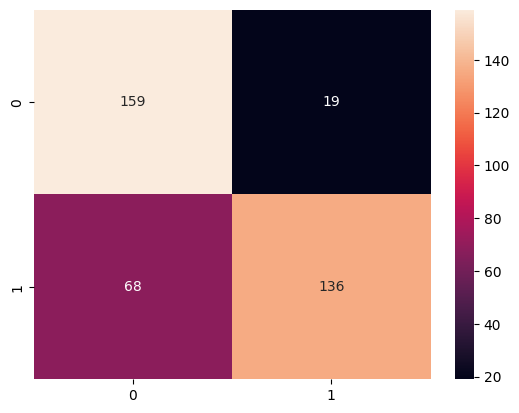

In [28]:
cm = confusion_matrix(y_test,dt_pred)

sns.heatmap(cm, annot=True, fmt='d')

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

*Write your description here*

In my opinion, based on the evaluation, Decission Tree Classification is the best approach.

I chose f1 score as a metric because it takes into account both recall and precision which should best show if a model can succesfully determine if a person owned a moped or not.
For the best model I created a confusion matrix to visualize the result. The matrix shows that the model is much more prone to say that a person did not own a moped even though he or she did own it rather than identify a person that did not own one as an owner which can be summed up that the model is more likely to show false-negatives rather than false-positives. 

If we assume that people who did not own a moped are not welcome to give reviews, this scenario is more desirable because we are less likely to allow a non-desired person to review .

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam